In [62]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [34]:
time_slice = slice("2023-10-16 03:20","2023-10-16 03:40")

<Axes: xlabel='TIME'>

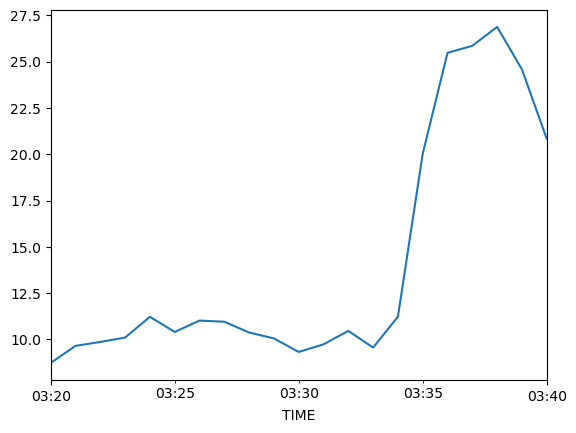

In [35]:
#From IMOS. 1-minute data as csv files
collection_url = "https://geoserver-portal.aodn.org.au/geoserver/ows?typeName=imos:soop_asf_mt_trajectory_data&SERVICE=WFS&outputFormat=csv&REQUEST=GetFeature&VERSION=1.0.0&CQL_FILTER=(cruise_id%20LIKE%20'v0623')&userId=Guest"
imos_df = pd.read_csv(collection_url,parse_dates=[6]).set_index("TIME")
imos_df.loc[time_slice].WSPD_1.plot()

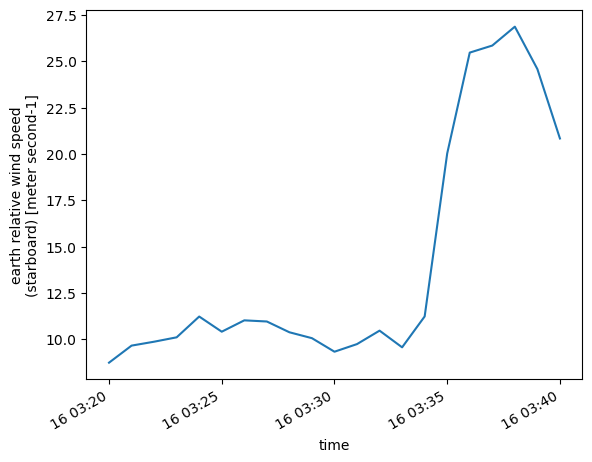

In [36]:
#Same data as above, but with metadata in netcdf format
#From here: https://thredds.aodn.org.au/thredds/catalog/IMOS/SOOP/SOOP-ASF/VLMJ_Investigator/meteorological_sst_observations/2023/catalog.html
url = "https://thredds.aodn.org.au/thredds/dodsC/IMOS/SOOP/SOOP-ASF/VLMJ_Investigator/meteorological_sst_observations/2023/IMOS_SOOP-ASF_MT_20231016T000000Z_VLMJ_FV01_C-20231017T040121Z.nc"
imos_ds = xr.open_dataset(url)
imos_ds.WSPD.sel(TIME=time_slice).plot()

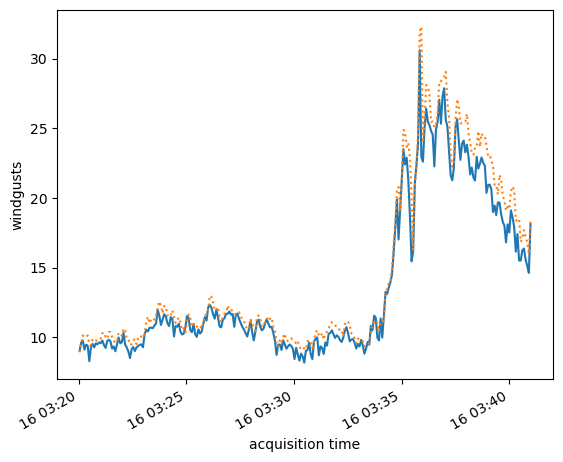

In [37]:
underway_data_path = "/Users/andrewb1/OneDrive - The University of Melbourne/rv_invest_cruise/data/underway/"

fnames = ["20231015-213339-weather-met_01.met","20231016-093341-weather-met_01.met"]
underway_weather = xr.open_mfdataset([underway_data_path+s for s in fnames])
(underway_weather["anemtruewindspeed"]/1.94384).sel(time=time_slice).plot()

fnames = ["20231015-213339-metstation-met_01.met","20231016-093341-metstation-met_01.met"]
underway_metstation = xr.open_mfdataset([underway_data_path+s for s in fnames])
(underway_metstation["windgusts"]/1.94384).sel(time=time_slice).plot(ls=":")

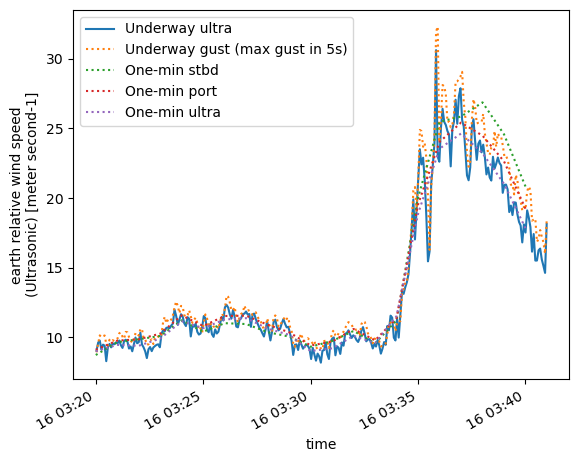

In [75]:
(underway_weather["anemtruewindspeed"]/1.94384).sel(time=time_slice).plot(label="Underway ultra")
(underway_metstation["windgusts"]/1.94384).sel(time=time_slice).plot(ls=":",label="Underway gust (max gust in 5s)")
imos_ds.WSPD.sel(TIME=time_slice).plot(ls=":",label="One-min stbd")
imos_ds.WSPD_2.sel(TIME=time_slice).plot(ls=":",label="One-min port")
imos_ds.WSPD_3.sel(TIME=time_slice).plot(ls=":",label="One-min ultra")
plt.legend()

In [57]:
pd.DataFrame({"meaning":imos_ds.WSPD_quality_control.quality_control_flag_meanings.split(" ")},index=imos_ds.WSPD_quality_control.quality_control_flag_values.split(", "))

,meaning
B,Value_out_of_bounds
C,Time_not_sequential
D,Failed_T_Tw_Td_test
E,Failed_true_wind_recomputation_test
F,Platform_velocity_unrealistic
G,Value_exceeds_threshold
H,Discontinuity
J,Erroneous_value
K,Suspect_value_(visual)
L,Value_located_over_land


In [74]:
underway_weather

<xarray.Dataset>
Dimensions:                      (time: 19043)
Coordinates:
  * time                         (time) datetime64[ns] 2023-10-15T21:33:39.70...
Data variables: (12/27)
    spspincomewave               (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    starboardcumulativedayrain   (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    moisture                     (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    focumulativedayrain          (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    relairheading                (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    airtemp                      (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    ...                           ...
    anemwindspeed                (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    spirincomewave               (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    relairspeed                  (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    starboardcumulativehourrain  (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    anemtruewinddir              (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
    starboardcurrentrain         (time) float32 dask.array<chunksize=(9522,), meta=np.ndarray>
Attributes: (12/24)
    history:                       TECHSAS V5.11 2023-10-15T21:33:39Z
    source:                        Acquisition of Metstation
    conventions:                   CF-1.0.
    creationtime:                  2023-10-15T21:33:39Z
    device_firstusedate:           2000-01-01T00:00:00Z
    device_deviceid:               met_01
    ...                            ...
    frame_minor:                   1
    frame_sourcetype:              met
    frame_period:                  0.1
    title:                         Technical and Scientific sensors Acquisiti...
    institution:                   IFR
    reference:                     http://www.ifremer.fr